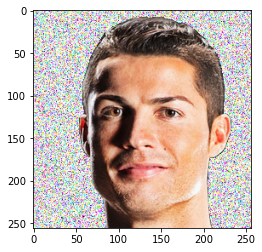

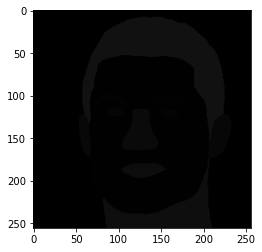

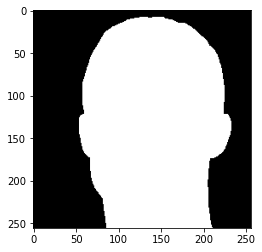

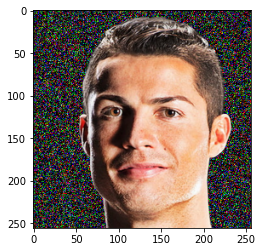

In [51]:
import torch as th
import glob, os
from PIL import Image
import blobfile as bf
import matplotlib.pyplot as plt
import numpy as np


def load_image(path):
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert("RGB")
    return pil_image

def face_segment(face_segment_anno, segment_part):
    face_segment_anno = np.array(face_segment_anno)
    bg = (face_segment_anno == 0)
    skin = (face_segment_anno == 1)
    l_brow = (face_segment_anno == 2)
    r_brow = (face_segment_anno == 3)
    l_eye = (face_segment_anno == 4)
    r_eye = (face_segment_anno == 5)
    eye_g = (face_segment_anno == 6)
    l_ear = (face_segment_anno == 7)
    r_ear = (face_segment_anno == 8)
    ear_r = (face_segment_anno == 9)
    nose = (face_segment_anno == 10)
    mouth = (face_segment_anno == 11)
    u_lip = (face_segment_anno == 12)
    l_lip = (face_segment_anno == 13)
    neck = (face_segment_anno == 14)
    neck_l = (face_segment_anno == 15)
    cloth = (face_segment_anno == 16)
    hair = (face_segment_anno == 17)
    hat = (face_segment_anno == 18)
    face = np.logical_or.reduce((skin, l_brow, r_brow, l_eye, r_eye, eye_g, l_ear, r_ear, ear_r, nose, mouth, u_lip, l_lip))
    
    if segment_part == 'faceseg_face':
        seg_m = face
    elif segment_part == 'faceseg_head':
        seg_m = (face | neck | hair)
    elif segment_part == 'faceseg_nohead':
        seg_m = ~(face | neck | hair)
    else: raise NotImplementedError(f"Segment part: {segment_part} is not found!")
    
    out = seg_m
    return out
        
img_name = 'cr7_1.png'
in_images = f'/home/mint/guided-diffusion/experiment_scripts/ITW_debugging/debugging_img/itw_images/aligned_images/images/valid/{img_name}'
mask_path = f'/home/mint/guided-diffusion/experiment_scripts/ITW_debugging/debugging_img/itw_images/aligned_images/face_segment/valid/anno/'


def replace_bg(size=256):
    # out_images = f'/home/mint/guided-diffusion/experiment_scripts/ITW_debugging/debugging_img/itw_images/aligned_images/images/valid/{img_name}'
    # os.makedirs(out_images, exist_ok=True)
    
    anno_fn = f"{mask_path}/anno_{img_name}"
    
    img = load_image(in_images)
    anno = load_image(anno_fn)
    mask = face_segment(anno, 'faceseg_head')
    
    sd = 58.050383371049826/127.5
    val = 0
    rpl_bg = np.random.normal(loc=val, scale=sd, size=(size, size, 3)) * 255
    bg = rpl_bg
    
    new_img = (mask * img) + (~mask * bg)
    
    # plt.title("Original & Anno & Maks & Replace")
    plt.imshow(np.array(img))
    plt.show()
    
    plt.imshow(np.array(anno))
    plt.show()
    
    plt.imshow(np.array(mask)*255)
    plt.show()
    
    new_img = np.clip(np.array(new_img), 0, 255).astype(np.uint8)
    plt.imshow(new_img)
    plt.show()
    new_img = Image.fromarray(new_img)
    new_img.save(fp=f"/home/mint/guided-diffusion/experiment_scripts/ITW_debugging/debugging_img/itw_images/aligned_images/images/valid/bg{img_name}")

replace_bg()